<a href="https://colab.research.google.com/github/guirzr1/ML_Credit_Score/blob/main/Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Credit Score


Objetivo desse projeto conjunto com a Alura é entender como o Machine Learning está no mercado financeiro, quais sao as particularidades desse setor e como construir, ajustar e escolher a melhor regressao logistica, será usada como motor na concessao de crédito do *ByteBank*, um banco digital.

Esse projeto é para entender como é usado os algoritmo por trás das decisoes das instituicaoes financeiras.


### Ciclo da Concessao de Crédito e risco associados

O crédito faz parte das nossas vidas o tempo todo: cartões de crédito, empréstimos pessoais e consignados, financiamento de veículos e imobiliários, são apenas alguns dos exemplos de como o crédito está inserido no nosso dia a dia.

Apesar disso poucas pessoas sabem quais sao as decisoes que sao tomadas por trás da concessao de credito.

A decisoes é composta pela cadeia de credito que é composta por quatro pilares: **A Prospecacao, a Concessao, a Gestao de Risco e a Recuperacao.**

 O Crediting Score, ele busca estimar a probabilidade de um evento acontecer frente a uma base de dados. Estamos falando de uma probabilidade, então o valor está concentrado entre 0 e 1.

 Pensando na concessão de crédito, o evento que nós estamos buscando é se um tomador vai ser inadimplente ou nao e isso é um evento binario.

 Toda concessao de crédito está  intrinsecamente relacionada ao risco.

 Podemos entender o risco de crédito como a probabilidade de receber um montante de dinheiro em um determinado período nao acontecer.

#### Carregamento dos dados

In [3]:
import pandas as pd

# Base de dados de crédito

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv')
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
# Informacoes da Base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [5]:
# Quantidade de linhas e colunas
dados.shape

(1000, 21)

#### Limpeza de Dados

In [6]:
# Verificando se existem valores duplicados
dados.duplicated().sum()

np.int64(0)

In [7]:
# Verificando se existem valores nulos
dados.isnull().sum()

,0
default,0
conta_corrente,0
prazo_emprestimo_meses,0
historico_credito,0
proposito_emprestimo,0
valor_emprestimo,0
reserva_cc,0
tempo_emprego_atual,0
taxa_comp_salario,0
sexo_est_civil,0


In [8]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


O Credit Scoring é um modelo estatístico multivariado que cria um modelo matemático e estima, através de uma probabilidade, a chance do nosso cliente ser adimplente ou inadimplente.


**CLASSIFICACAO**

O *ByteBank* precisa classificar os tomadores em bons e maus pagadores. Existem alguns algoritmos que são capazes de fazer essa classificação, por exemplo: a regressão logística, o random forest, Naive Bayes, support vector machine.

Vamos explorar a regressao Logistica. Ela é uma técnica muito usada no sistema financeiro e existem alguns motivos para isso. O primeiro deles é que ela tem um alto comprometimento com a explicabilidade, além de exigir pouco poder computacional.

#### Importacoes

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Pipeline

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       214
           1       0.53      0.74      0.62        86

    accuracy                           0.74       300
   macro avg       0.71      0.74      0.71       300
weighted avg       0.78      0.74      0.75       300



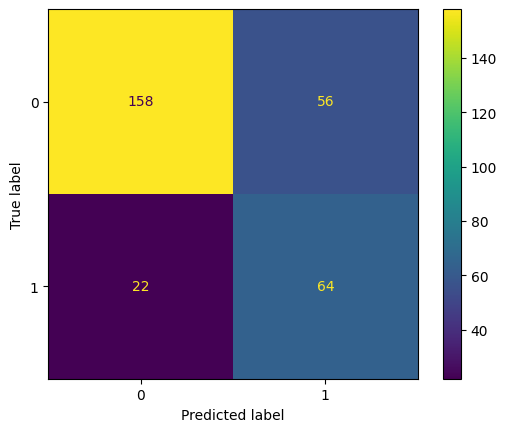

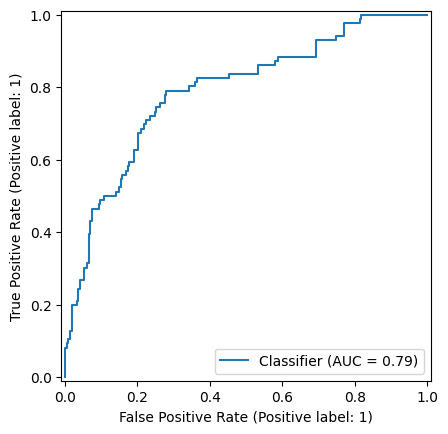

In [10]:
# Separar variaveis
X = dados.drop('default', axis=1)
y = dados['default']

# Identificar colunas categoricas e numericas
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Separar em treino e teste
SEED = 77
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Pre-processamento

preprocessador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Pipeline com SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessador', preprocessador),
    ('oversample', SMOTE(random_state=SEED)),
    ('modelo', LogisticRegression(max_iter=1000, random_state=SEED))
])

# Hiperparâmetros para ajuste
param_grid = {
    'modelo__C': [0.01, 0.1, 1, 10],  # Regularização
    'modelo__penalty': ['l2'],
    'modelo__solver': ['lbfgs'],
    'modelo__max_iter': [1000]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)


# Treinamento do modelo
grid.fit(X_train, y_train)

# Predição
modelo = grid.best_estimator_

y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# Avaliação do modelo
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm.plot()

# Curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_proba)


#### Baseline com DumnmyClassifier

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [12]:
dummy = DummyClassifier(strategy='stratified', random_state=77)
dummy.fit(X_train, y_train)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]
auc_dummy = roc_auc_score(y_test, y_proba_dummy)
print(f"AUC do DummyClassifier (estratégia stratified): {auc_dummy:.4f}")


AUC do DummyClassifier (estratégia stratified): 0.4678


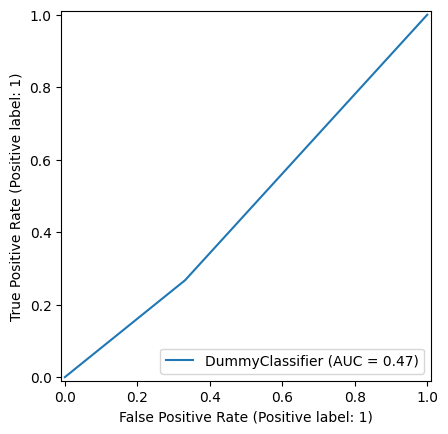

In [13]:
#plot roc curve
RocCurveDisplay.from_estimator(dummy,X_test ,y_test)

#### Modelo Treino

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

def modelo_regressionlogistic_creditscore(dados, target='default', seed=77):
    # Separar variáveis
    X = dados.drop(target, axis=1)
    y = dados[target]

    # Identificar colunas categóricas e numéricas
    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = X.select_dtypes(include='object').columns.tolist()

    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    print(f"A base de treino tem {X_train.shape[0]} elementos e a base de teste tem {X_test.shape[0]} elementos.\n")

    # Pré-processamento
    preprocessador = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

    # Pipeline com SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessador', preprocessador),
        ('oversample', SMOTE(random_state=seed)),
        ('modelo', LogisticRegression(max_iter=1000, random_state=seed))
    ])

    # Hiperparâmetros para ajuste
    param_grid = {
        'modelo__C': [0.01, 0.1, 1, 10],
        'modelo__penalty': ['l2'],
        'modelo__solver': ['lbfgs'],
        'modelo__max_iter': [1000]
    }

    # Ajuste com GridSearchCV
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Melhor modelo
    modelo = grid.best_estimator_

    # Predição
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Avaliação
    print("\nRelatório de Classificação:\n")
    print(classification_report(y_test, y_pred))

    print("\nMatriz de Confusão:")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)

    print("\nCurva ROC:")
    RocCurveDisplay.from_predictions(y_test, y_pred_proba)

    return modelo




In [15]:
import os

# Garante que a pasta models exista
os.makedirs("models", exist_ok=True)

# Agora salva o modelo
import joblib
joblib.dump(modelo, "models/logistic_regression_model.pkl")


['models/logistic_regression_model.pkl']

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       214
           1       0.53      0.74      0.62        86

    accuracy                           0.74       300
   macro avg       0.71      0.74      0.71       300
weighted avg       0.78      0.74      0.75       300


Matriz de Confusão:

Curva ROC:


Pipeline(steps=[('preprocessador',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['prazo_emprestimo_meses',
                                                   'valor_emprestimo',
                                                   'taxa_comp_salario',
                                                   'anos_residencia_atual',
                                                   'idade', 'n_creditos_banco',
                                                   'n_dependentes']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['conta_corrente',
                                                   'historico_credito',
                                                   'proposito_emprestimo',
                                                   'reserva_cc',
                                                   'tempo_emprego_atual',
                                                   'sexo_est_civil',
                                                   'outros_fiadores',
                                                   'propriedade',
                                                   'outros_planos_financiamento',
                                                   'tipo_residencia',
                                                   'status_emprego', 'telefone',
                                                   'trabalhador_estrangeiro'])])),
                ('oversample', SMOTE(random_state=77)),
                ('modelo',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=77))])

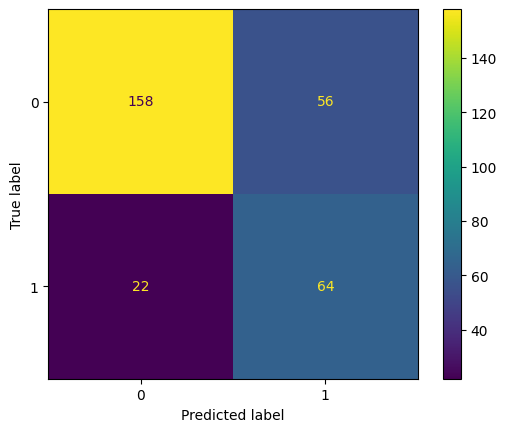

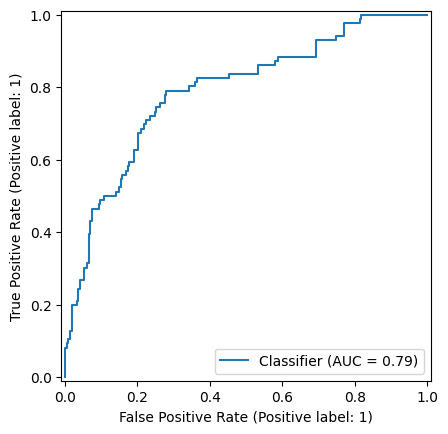

In [16]:
modelo_regressionlogistic_creditscore(dados)

Um aspecto que nós ainda não mencionamos e que é muito importante e relevante no sistema financeiro, é que neste sistema nós não analisamos o indivíduo.
Nós analisamos o comportamento de um grupo e ajustamos esse individuo dentro de um grupo.

#### Features Engineering : Criando novas Variaveis

In [17]:
# Retirar colunas da base de dados, baseado na Lei de Proteção de Dados (LGPD)
colunas_lgpd= ['sexo_est_civil', 'sexo']
base_dados_lgpd = dados.drop(columns=colunas_lgpd, errors='ignore')

base_dados_lgpd.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


##### Agrupamento de Idade em Faixas de Idade

In [18]:
## Agrupar a idade em faixas



def aplicar_faixa_idade(base_dados_lgpd, coluna='idade', nova_coluna='faixa_idade'):
    bins = [18, 30, 40, 50, 60, 70, 80]
    labels = [1, 2, 3, 4, 5, 6]
    base_dados_lgpd[nova_coluna] = pd.cut(base_dados_lgpd[coluna], bins=bins, labels=labels, right=False)
    return base_dados_lgpd





##### Criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

In [19]:
# Passo 1: Definir a função
def aplicar_faixa_prazo(df):
    df['faixa_prazo_emprestimo'] = pd.cut(
        x=df['prazo_emprestimo_meses'],
        bins=[1, 12, 24, 36, 48, 60, 72],
        labels=[1, 2, 3, 4, 5, 6],
        right=True
    )
    return df


##### Funcao aplicar_faixa_valor

In [20]:
def aplicar_faixa_valor(df):
    bins = list(range(1, 21000, 1000))  # Vai de 1 até 20000, criando 20 intervalos
    labels = list(range(1, 21))         # 20 labels para 20 intervalos

    df['faixa_valor_emprestimo'] = pd.cut(
        x=df['valor_emprestimo'],
        bins=bins,
        labels=labels,
        right=True
    )
    return df



In [21]:
# Executar as funções

base_dados_lgpd = aplicar_faixa_idade(base_dados_lgpd)
base_dados_lgpd = aplicar_faixa_prazo(base_dados_lgpd)
base_dados_lgpd = aplicar_faixa_valor(base_dados_lgpd)

In [22]:
base_dados_lgpd.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,...,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,5,1,2
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,...,none,own,1,skilled employee / official,1,none,yes,1,4,6
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,...,none,own,1,unskilled - resident,2,none,yes,3,1,3
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,...,none,for free,1,skilled employee / official,2,none,yes,3,4,8
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,...,none,for free,2,skilled employee / official,2,none,yes,4,2,5


##### Melhor Modelo

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       214
           1       0.52      0.76      0.62        86

    accuracy                           0.73       300
   macro avg       0.70      0.74      0.70       300
weighted avg       0.78      0.73      0.74       300


Matriz de Confusão:

Curva ROC:


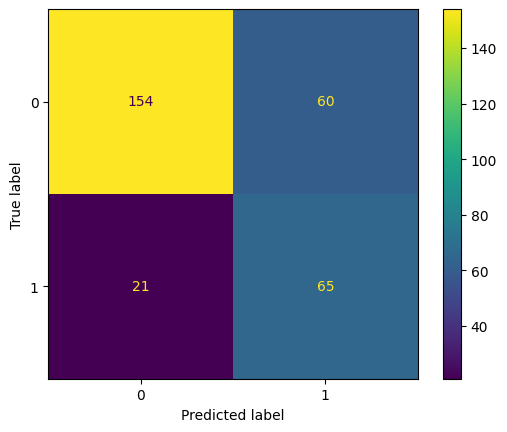

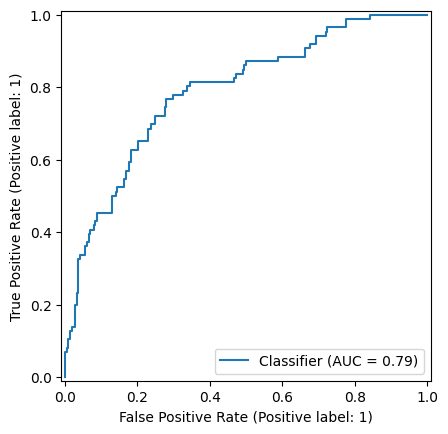

In [23]:
# Modelo com as variáveis selecionadas
modelo = modelo_regressionlogistic_creditscore(base_dados_lgpd, target='default')



#### Funcao para testar outros Modelos como XGboost, RandomForest, DecisionTreeClassifier ...

In [24]:
# Funcao Flexivel para testar outros modelos

def modelo_geral_credit_score(dados, modelo, target='default', seed=77):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report

    # Separando os dados
    X = dados.drop(target, axis=1)
    y = dados[target]

    # Separando treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)

    # Treinando o modelo que foi passado como argumento
    modelo.fit(X_train, y_train)

    # Fazendo as previsões
    y_pred = modelo.predict(X_test)

    # Exibindo os resultados
    print(classification_report(y_test, y_pred))

    return modelo
